In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

In [65]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
features = ['bedrooms', 'sqft_living',
   'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
   'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
   'lat', 'long', 'sqft_lot15']
df_features = df[features]
target = df['price']

In [66]:
run_tests()

Training:  204421 vs. Testing:  212370


In [67]:
df_features.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [68]:
df_features.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [69]:
corr = df_features.corr()

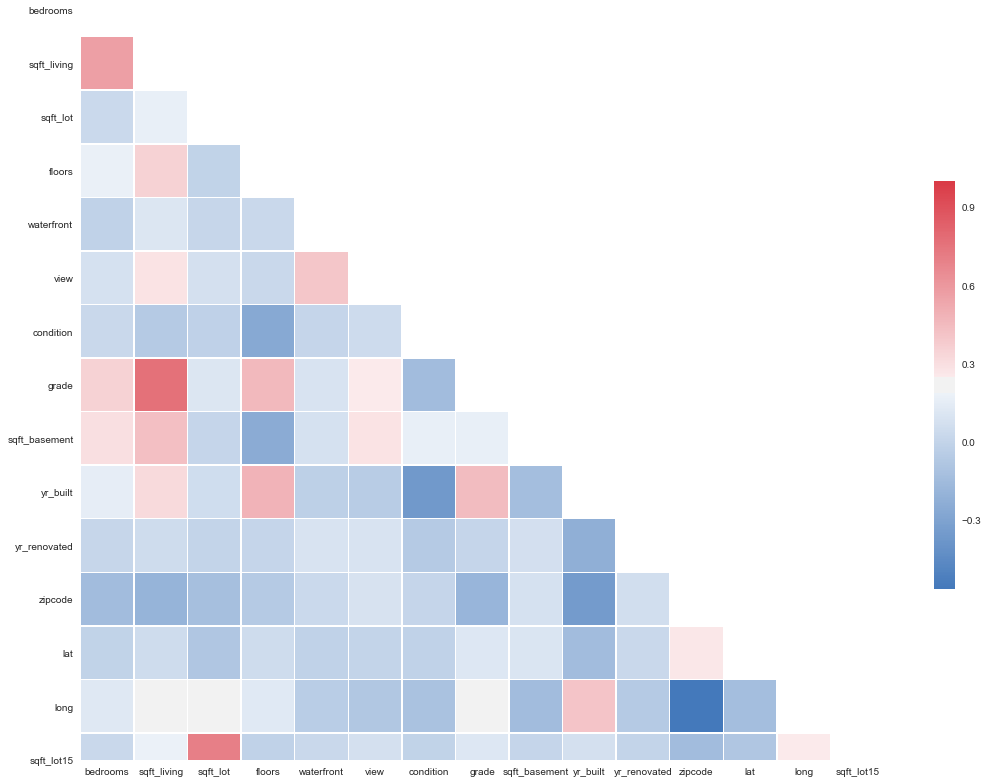

In [70]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(18, 15))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [73]:
"+".join(features)

'bedrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [74]:
ols(formula='price~'+"+".join(features), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2631.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:39:39   Log-Likelihood:            -2.3609e+05
No. Observations:               17290   AIC:                         4.722e+05
Df Residuals:                   17274   BIC:                         4.723e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.013e+06   3.29e+06      2.130      0.033     5.6e+05    1.35e+07
bedrooms      -3.203e+04   2087.691    -15.343      0.000   -3.61e+04   -2.79e+04
sqft_living     210.8651      3.624     58.179      0.000     203.761     217.969
sqft_lot          0.0910      0.052      1.739      0.082      -0.012       0.194
floors         1.456e+04   3946.578      3.690      0.000    6828.813    2.23e+04
waterfront     5.889e+05   1.94e+04     30.385      0.000    5.51e+05    6.27e+05
view           5.523e+04   2394.658     23.064      0.000    5.05e+04    5.99e+04
condition      2.792e+04   2672.740     10.445      0.000    2.27e+04    3.32e+04
grade           1.01e+05   2359.786     42.811      0.000    9.64e+04    1.06e+05
sqft_basement   -27.6658      4.887     -5.661      0.000     -37.245     -18.087
yr_built      -2356.8212     78.062    -30.192      0.000   -2509.831   -2203.811
yr_renovated     22.4041      4.147      5.402      0.000      14.275      30.533
zipcode        -591.3270     37.526    -15.758      0.000    -664.882    -517.772
lat            6.082e+05   1.23e+04     49.586      0.000    5.84e+05    6.32e+05
long          -2.129e+05   1.48e+04    -14.397      0.000   -2.42e+05   -1.84e+05
sqft_lot15       -0.3243      0.082     -3.949      0.000      -0.485      -0.163
==============================================================================
Omnibus:                    15124.448   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1633087.392
Skew:                           3.715   Prob(JB):                         0.00
Kurtosis:                      50.028   Cond. No.                     2.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
run_tests()

Training:  204421 vs. Testing:  212370


In [82]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

def run_tests():
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

    lm = LinearRegression()

    lm = lm.fit(X_train, y_train)

    y_train_pred = lm.predict(X_train)

    # train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    # train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    price_std = target.std()
    y_pred = lm.predict(X_test)

    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

In [85]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [86]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17156,5,2.50,2400,4496,2.0,0,0,3,7,2400,0,2004,0,98042,47.3692,-122.126,1880,4319
6138,3,1.75,2190,6000,1.5,0,0,4,7,2190,0,1920,0,98002,47.3063,-122.223,1610,6000
6736,3,1.50,1460,5040,1.0,0,0,3,7,1100,360,1971,0,98133,47.7112,-122.357,2330,7560
4449,4,1.75,1530,17664,1.5,0,0,3,7,1530,0,1968,0,98058,47.4549,-122.155,1530,11625
3305,2,1.00,950,4560,1.5,0,0,3,7,950,0,1925,0,98112,47.6288,-122.300,2040,4560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,3,2.50,1741,5701,2.0,0,0,3,8,1741,0,2012,0,98030,47.3790,-122.184,2002,5700
3157,4,2.25,2470,7800,1.0,0,0,3,8,1470,1000,1975,0,98052,47.6913,-122.115,2050,8050
10730,3,1.00,1250,7157,1.0,0,0,3,7,1250,0,1944,2010,98125,47.7323,-122.304,1300,6796
5242,4,1.75,3420,7200,1.0,0,3,5,8,1770,1650,1947,0,98125,47.7081,-122.277,2450,6200


In [87]:
from sklearn import linear_model

lm = LinearRegression()

lm = lm.fit(X_train, y_train)

In [88]:
print(lm.intercept_)
print(lm.coef_)

7263517.4256095635
[-3.41766475e+04  3.85463731e+04  1.15066722e+02  1.54230537e-01
  8.36894624e+03  5.82910844e+05  4.97702764e+04  2.58359135e+04
  9.62806465e+04  7.14300463e+01  4.36366763e+01 -2.63711462e+03
  1.25547495e+01 -6.01399974e+02  6.05695710e+05 -2.24320736e+05
  1.85650064e+01 -3.43933615e-01]


In [89]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.7004771200773728


In [90]:
y_train_pred = lm.predict(X_train)

In [91]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 126313.04589283756
Mean Squared Error: 41474361222.102844
Root Mean Squared Error: 203652.55024699014


In [92]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.33835152532566337
Z-Score of Root Mean Squared Error: 0.5455188775274215


In [93]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

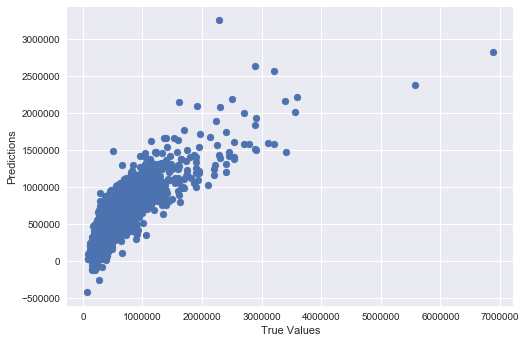

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

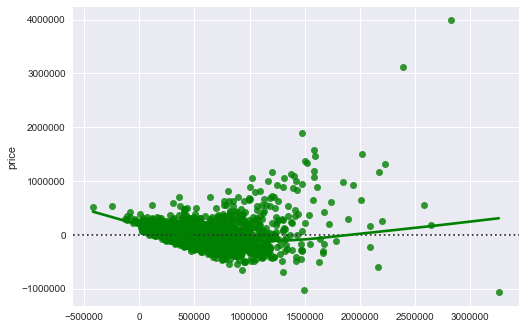

In [95]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [96]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.6883772559631929


In [97]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:128592.35793014344
Mean Squared Error:44536592726.503716
Root Mean Squared Error:211036.9463541958


In [98]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.344457060182054
Root Mean Squared Error Z: 0.5652992705091697


In [79]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  203652 vs. Testing:  211036


In [8]:
df_features, target = run_file('kc_house_data_train.csv')